# part 1 supervised learning

In [20]:
#import the libararies
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns

In [21]:
#import dataset 
data=pd.read_csv("CW2_dataset.csv")
print(data)
data_1=pd.read_csv("CW2_dataset_PatientID_labels.csv")
print(data_1)

                                       Gene Description Gene Accession Number  \
0                   AFFX-BioB-5_at (endogenous control)        AFFX-BioB-5_at   
1                   AFFX-BioB-M_at (endogenous control)        AFFX-BioB-M_at   
2                   AFFX-BioB-3_at (endogenous control)        AFFX-BioB-3_at   
3                   AFFX-BioC-5_at (endogenous control)        AFFX-BioC-5_at   
4                   AFFX-BioC-3_at (endogenous control)        AFFX-BioC-3_at   
...                                                 ...                   ...   
7124  PTGER3 Prostaglandin E receptor 3 (subtype EP3...             X83863_at   
7125  HMG2 High-mobility group (nonhistone chromosom...             Z17240_at   
7126      RB1 Retinoblastoma 1 (including osteosarcoma)           L49218_f_at   
7127  GB DEF = Glycophorin Sta (type A) exons 3 and ...           M71243_f_at   
7128                          GB DEF = mRNA (clone 1A7)           Z78285_f_at   

          1    2     3     

In [22]:
#checking for missing values
a=data.columns[data.isnull().any()]
a

Index(['1', '4', '6', '11', '21', '22', '29', '34', '44', '45', '46'], dtype='object')

In [23]:
data['1'].fillna((data['1'].mean()), inplace=True)
data["1"].isnull().sum()
data['4'].fillna((data['4'].mean()), inplace=True)
data['6'].fillna((data['6'].mean()), inplace=True)
data['11'].fillna((data['11'].mean()), inplace=True)
data['21'].fillna((data['21'].mean()), inplace=True)
data['22'].fillna((data['22'].mean()), inplace=True)
data['29'].fillna((data['29'].mean()), inplace=True)
data['34'].fillna((data['34'].mean()), inplace=True)
data['44'].fillna((data['44'].mean()), inplace=True)
data['45'].fillna((data['45'].mean()), inplace=True)
data['46'].fillna((data['46'].mean()), inplace=True)

In [24]:
display(data.dtypes)
data.info()
data.describe().T #datasets are described in this step

Gene Description          object
Gene Accession Number     object
1                        float64
2                          int64
3                          int64
                          ...   
68                         int64
69                         int64
70                         int64
71                         int64
72                         int64
Length: 74, dtype: object

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7129 entries, 0 to 7128
Data columns (total 74 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Gene Description       7129 non-null   object 
 1   Gene Accession Number  7129 non-null   object 
 2   1                      7129 non-null   float64
 3   2                      7129 non-null   int64  
 4   3                      7129 non-null   int64  
 5   4                      7129 non-null   float64
 6   5                      7129 non-null   int64  
 7   6                      7129 non-null   float64
 8   7                      7129 non-null   int64  
 9   8                      7129 non-null   int64  
 10  9                      7129 non-null   int64  
 11  10                     7129 non-null   int64  
 12  11                     7129 non-null   float64
 13  12                     7129 non-null   int64  
 14  13                     7129 non-null   int64  
 15  14  

,count,mean,std,min,25%,50%,75%,max
1,7129.0,641.226010,2264.263028,-19826.0,-21.0,159.0,535.0,31086.0
2,7129.0,690.246318,2468.814372,-17930.0,-14.0,130.0,488.0,29288.0
3,7129.0,698.307897,2485.656277,-27182.0,-31.0,177.0,610.0,28056.0
4,7129.0,600.972643,2340.047185,-23396.0,-33.0,139.0,497.0,31449.0
5,7129.0,679.532894,2375.895416,-10339.0,8.0,146.0,471.0,29543.0
...,...,...,...,...,...,...,...,...
68,7129.0,734.933511,2433.042040,-12527.0,-3.0,143.0,537.0,29374.0
69,7129.0,744.386590,2396.618703,-10279.0,1.0,154.0,554.0,26073.0
70,7129.0,520.213354,2362.872338,-11535.0,-17.0,75.0,293.0,39827.0
71,7129.0,575.054987,2309.515245,-10873.0,-6.0,108.0,375.0,28409.0


In [25]:
colmns=['Gene Description','Gene Accession Number']#dropping these two columns 
b=data.drop(columns=colmns)
c=b.T
print(c)

     0      1      2      3      4      5      6      7      8      9     ...  \
1  -214.0 -153.0  -58.0   88.0 -295.0 -558.0  199.0 -176.0  252.0  206.0  ...   
2  -139.0  -73.0   -1.0  283.0 -264.0 -400.0 -330.0 -168.0  101.0   74.0  ...   
3   -76.0  -49.0 -307.0  309.0 -376.0 -650.0   33.0 -367.0  206.0 -215.0  ...   
4  -135.0 -114.0  265.0   12.0 -419.0 -585.0  158.0 -253.0   49.0   31.0  ...   
5  -106.0 -125.0  -76.0  168.0 -230.0 -284.0    4.0 -122.0   70.0  252.0  ...   
..    ...    ...    ...    ...    ...    ...    ...    ...    ...    ...  ...   
68 -154.0 -136.0   49.0  180.0 -257.0 -273.0  141.0 -123.0   52.0  878.0  ...   
69  -79.0 -118.0  -30.0   68.0 -110.0 -264.0  -28.0  -61.0   40.0 -217.0  ...   
70  -55.0  -44.0   12.0  129.0 -108.0 -301.0 -222.0 -133.0  136.0  320.0  ...   
71  -59.0 -114.0   23.0  146.0 -171.0 -227.0  -73.0 -126.0   -6.0  149.0  ...   
72 -131.0 -126.0  -50.0  211.0 -206.0 -287.0  -34.0 -114.0   62.0  341.0  ...   

     7119    7120   7121   

In [26]:
#Encoding the catergorical data
from sklearn.preprocessing import LabelEncoder
encode=LabelEncoder()
data_1["cancer"]=encode.fit_transform(data_1["cancer"])

print(data_1["cancer"])
data_1["cancer"].value_counts()

0     0
1     0
2     0
3     0
4     0
     ..
67    0
68    0
69    0
70    0
71    0
Name: cancer, Length: 72, dtype: int32


0    47
1    25
Name: cancer, dtype: int64

In [27]:
#we got to know that there are 2 classes and it is imbalanced.so we should be using imbalance classifier

In [28]:

new=c.join(data_1["cancer"])
new.shape
x=new.iloc[:,:-1] #x -values
y=data_1["cancer"] #y-values
x.shape

(72, 7129)

In [29]:
#normaling the data
from sklearn.preprocessing import MinMaxScaler as mn
scaling=mn()
scale=scaling.fit_transform(x)
#scaler=scaling.transform(x)


In [30]:
#as we found there are lots features in this datatypes so we are applying dimensionality reduction technique for computational process
from sklearn import decomposition
from sklearn.decomposition import PCA


In [31]:
pca=decomposition.PCA()

pca=PCA(n_components=72)


In [32]:
pca.fit(scale)

PCA(n_components=72)

In [33]:
x_pca=pca.transform(scale)

In [34]:
scale.shape #x_data shape before applying pca

(72, 7129)

In [35]:
x_pca.shape  #x_data shape after applying pca

(72, 72)

In [36]:
#when we are applying pca there are possiblity of losing the important information given in dataset 
#so it is better to check that we have retained all information after pca 
pca.explained_variance_ratio_.sum()

1.0

In [37]:
# as we mentioned previously that we got imbalanced dataset. we need to imbalance learn
!pip install imblearn
from imblearn.over_sampling import SMOTE

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(x_pca, y, test_size=0.20, random_state=4)

In [38]:
print("BeforeSampling, counts '1': {}".format(sum(y_train==1)))
print("BeforeSampling, counts '0': {} \n".format(sum(y_train==0)))


BeforeSampling, counts '1': 19
BeforeSampling, counts '0': 38 



In [39]:
smo = SMOTE(random_state=2)
X_train_1, y_train_1 = smo.fit_resample(X_train, y_train.ravel())

In [40]:
print("AfterSampling, counts  '1': {}".format(sum(y_train_1==1)))
print("AfterSampling, counts '0': {}".format(sum(y_train_1==0)))

AfterSampling, counts  '1': 38
AfterSampling, counts '0': 38


In [41]:
#K-NEAREST NEIGHBOUR
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors=5)
classifier.fit(X_train_1, y_train_1)

KNeighborsClassifier()

In [42]:
y_pred = classifier.predict(X_test)

In [45]:
#METRICS 
from sklearn import metrics
from sklearn.metrics import classification_report, confusion_matrix

conf=confusion_matrix(y_test, y_pred)
print(classification_report(y_test, y_pred))




              precision    recall  f1-score   support

           0       1.00      0.78      0.88         9
           1       0.75      1.00      0.86         6

    accuracy                           0.87        15
   macro avg       0.88      0.89      0.87        15
weighted avg       0.90      0.87      0.87        15



[[7 2]
 [0 6]]
0.8888888888888888


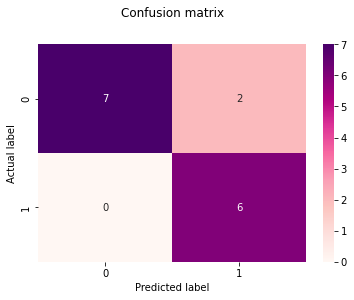

In [46]:
print(conf)
p = sns.heatmap(pd.DataFrame(conf), annot=True, cmap="RdPu" )
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
auc_knn = metrics.roc_auc_score(y_test, y_pred) #AUC finding
print(auc_knn)

In [48]:
#import GridSearchCV FOR cross validation
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV
grid = {'n_neighbors':np.arange(1,50)}
knn = KNeighborsClassifier()
knn_grid= GridSearchCV(classifier,grid,cv=5)
knn_grid.fit(X_train_1,y_train_1)

print("Best Score:" + str(knn_grid.best_score_))
print("Best Parameters: " + str(knn_grid.best_params_))
my_score=accuracy_score(y_test, y_pred)
print('my_score:\t',my_score)

Best Score:0.9216666666666666
Best Parameters: {'n_neighbors': 2}
my_score:	 0.8666666666666667


In [49]:
#SVM ALGORITHM
from sklearn import svm
classifier_1=svm.SVC(kernel='linear')
classifier_1.fit(X_train_1, y_train_1)
y_pred_1 = classifier.predict(X_test)


In [50]:

from sklearn import metrics
print("Accuracy:",metrics.accuracy_score(y_test, y_pred_1))

Accuracy: 0.8666666666666667


In [51]:
print("Precision:",metrics.precision_score(y_test, y_pred_1))

Precision: 0.75


In [52]:
print("Recall:",metrics.recall_score(y_test, y_pred_1))
print("confusion matrix:",metrics.confusion_matrix(y_test, y_pred_1))

Recall: 1.0
confusion matrix: [[7 2]
 [0 6]]


In [53]:
print('f1-score ',metrics.f1_score(y_test, y_pred_1))

f1-score  0.8571428571428571


In [54]:
from sklearn.model_selection import GridSearchCV
search_grid = { 'C':[0.1,1,100,1000],'kernel':['linear']}
search=GridSearchCV(estimator= classifier_1,param_grid = search_grid, scoring = 'accuracy',cv = 5)
grid_search = search.fit(X_train_1, y_train_1)
               

In [55]:
print("Best Score:" + str(search.best_score_))
print("Best Parameters: " + str(search.best_params_))
my_score1=accuracy_score(y_test, y_pred_1)
print('my_score:\t',my_score1)

Best Score:0.9875
Best Parameters: {'C': 0.1, 'kernel': 'linear'}
my_score:	 0.8666666666666667


[[7 2]
 [0 6]]
the auc of svm is :	 0.8888888888888888


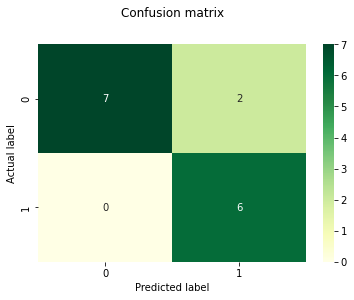

In [56]:
conf1=confusion_matrix(y_test, y_pred_1)
print(conf1)
p = sns.heatmap(pd.DataFrame(conf), annot=True, cmap="YlGn" )
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
auc_svm = metrics.roc_auc_score(y_test, y_pred_1) #AUC finding
print('the auc of svm is :\t',auc_svm)

# SUMMARY
#from the above we got to know that there isnt much  big difference between K-nearest neighbour and Support Vector Machine alogrithms.
#the K nearest neighbour has the accuracy of 87% and the SVM has the accuracy of  86%. based on these scores i will say my KNN performed slightly better than svm.
#but after applying grid search cv , SVM alogrithm performs better by changing its parameters value such as c=0.1 and the score is 98.75. in same way if K-nearest neighbour performs well if its parameters of neighbor=2.

# PART 2 UNSUPERVISED LEARNING

In [309]:
#import libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns



In [310]:
#import dataset 
data=pd.read_csv("CW2_dataset.csv")
print(data)
data_1=pd.read_csv("CW2_dataset_PatientID_labels.csv")
print(data_1)

                                       Gene Description Gene Accession Number  \
0                   AFFX-BioB-5_at (endogenous control)        AFFX-BioB-5_at   
1                   AFFX-BioB-M_at (endogenous control)        AFFX-BioB-M_at   
2                   AFFX-BioB-3_at (endogenous control)        AFFX-BioB-3_at   
3                   AFFX-BioC-5_at (endogenous control)        AFFX-BioC-5_at   
4                   AFFX-BioC-3_at (endogenous control)        AFFX-BioC-3_at   
...                                                 ...                   ...   
7124  PTGER3 Prostaglandin E receptor 3 (subtype EP3...             X83863_at   
7125  HMG2 High-mobility group (nonhistone chromosom...             Z17240_at   
7126      RB1 Retinoblastoma 1 (including osteosarcoma)           L49218_f_at   
7127  GB DEF = Glycophorin Sta (type A) exons 3 and ...           M71243_f_at   
7128                          GB DEF = mRNA (clone 1A7)           Z78285_f_at   

          1    2     3     

In [311]:
#missing values
a=data.columns[data.isnull().any()]
a

Index(['1', '4', '6', '11', '21', '22', '29', '34', '44', '45', '46'], dtype='object')

In [312]:
display(data.dtypes)
data.info()
data.describe().T

Gene Description          object
Gene Accession Number     object
1                        float64
2                          int64
3                          int64
                          ...   
68                         int64
69                         int64
70                         int64
71                         int64
72                         int64
Length: 74, dtype: object

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7129 entries, 0 to 7128
Data columns (total 74 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Gene Description       7129 non-null   object 
 1   Gene Accession Number  7129 non-null   object 
 2   1                      7128 non-null   float64
 3   2                      7129 non-null   int64  
 4   3                      7129 non-null   int64  
 5   4                      7128 non-null   float64
 6   5                      7129 non-null   int64  
 7   6                      7128 non-null   float64
 8   7                      7129 non-null   int64  
 9   8                      7129 non-null   int64  
 10  9                      7129 non-null   int64  
 11  10                     7129 non-null   int64  
 12  11                     7128 non-null   float64
 13  12                     7129 non-null   int64  
 14  13                     7129 non-null   int64  
 15  14  

,count,mean,std,min,25%,50%,75%,max
1,7128.0,641.226010,2264.421873,-19826.0,-21.0,159.0,535.00,31086.0
2,7129.0,690.246318,2468.814372,-17930.0,-14.0,130.0,488.00,29288.0
3,7129.0,698.307897,2485.656277,-27182.0,-31.0,177.0,610.00,28056.0
4,7128.0,600.972643,2340.211347,-23396.0,-33.0,139.0,496.25,31449.0
5,7129.0,679.532894,2375.895416,-10339.0,8.0,146.0,471.00,29543.0
...,...,...,...,...,...,...,...,...
68,7129.0,734.933511,2433.042040,-12527.0,-3.0,143.0,537.00,29374.0
69,7129.0,744.386590,2396.618703,-10279.0,1.0,154.0,554.00,26073.0
70,7129.0,520.213354,2362.872338,-11535.0,-17.0,75.0,293.00,39827.0
71,7129.0,575.054987,2309.515245,-10873.0,-6.0,108.0,375.00,28409.0


In [313]:
colmns=['Gene Description','Gene Accession Number']
# b=data.drop(['Gene Description','Gene Accession Number'],axis=1,inplace=True)
b=data.drop(columns=colmns)
c=b.T
print(c)
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(missing_values=np.nan, strategy='mean')
imputer.fit(c)
X = imputer.transform(c)
print(X)

     0      1      2      3      4      5      6      7      8      9     ...  \
1  -214.0 -153.0  -58.0   88.0 -295.0 -558.0  199.0 -176.0  252.0  206.0  ...   
2  -139.0  -73.0   -1.0  283.0 -264.0 -400.0 -330.0 -168.0  101.0   74.0  ...   
3   -76.0  -49.0 -307.0  309.0 -376.0 -650.0   33.0 -367.0  206.0 -215.0  ...   
4  -135.0 -114.0  265.0   12.0 -419.0 -585.0  158.0 -253.0   49.0   31.0  ...   
5  -106.0 -125.0  -76.0  168.0 -230.0 -284.0    4.0 -122.0   70.0  252.0  ...   
..    ...    ...    ...    ...    ...    ...    ...    ...    ...    ...  ...   
68 -154.0 -136.0   49.0  180.0 -257.0 -273.0  141.0 -123.0   52.0  878.0  ...   
69  -79.0 -118.0  -30.0   68.0 -110.0 -264.0  -28.0  -61.0   40.0 -217.0  ...   
70  -55.0  -44.0   12.0  129.0 -108.0 -301.0 -222.0 -133.0  136.0  320.0  ...   
71  -59.0 -114.0   23.0  146.0 -171.0 -227.0  -73.0 -126.0   -6.0  149.0  ...   
72 -131.0 -126.0  -50.0  211.0 -206.0 -287.0  -34.0 -114.0   62.0  341.0  ...   

     7119    7120   7121   

In [314]:
from sklearn.preprocessing import StandardScaler as mn
scaling=mn()
scale=scaling.fit_transform(X)
scale.min(axis=0)
scale.max(axis=0)
print(scale)


#Encoding the catergorical data
from sklearn.preprocessing import LabelEncoder
encode=LabelEncoder()
data_1["cancer"]=encode.fit_transform(data_1["cancer"])

print(data_1["cancer"])
data_1["cancer"].value_counts()

[[-1.02430984  0.07463337 -0.40979439 ...  0.59311854 -0.39137774
  -0.16111696]
 [-0.25156981  0.91262207  0.05802096 ...  0.03210258 -0.57699018
   0.41514587]
 [ 0.39753182  1.16401868 -2.4534088  ...  0.70532173 -0.33165895
  -0.26133658]
 ...
 [ 0.61389902  1.21639298  0.16471569 ... -0.30450699 -0.41558806
   1.76811076]
 [ 0.57268622  0.48315286  0.25499584 ... -0.21474444 -0.58021822
   0.46525568]
 [-0.16914421  0.35745456 -0.34413609 ...  0.54823726 -0.31713276
   0.71580473]]
0     0
1     0
2     0
3     0
4     0
     ..
67    0
68    0
69    0
70    0
71    0
Name: cancer, Length: 72, dtype: int32


0    47
1    25
Name: cancer, dtype: int64

In [315]:
labels=data_1["cancer"]

In [316]:
from sklearn import decomposition
from sklearn.decomposition import PCA

In [317]:
pca=decomposition.PCA()

pca=PCA(n_components=2)


In [318]:
x_pca=pca.fit_transform(scale)

In [319]:
#using silhoutte to find optimal k values
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples,silhouette_score
sil_score_kmeans = []
for n in range(2, 11):
    kmean = KMeans(n_clusters=n)
    kmean_labels = kmean.fit_predict(x_pca)
    print(n)
    kmean_score = silhouette_score(x_pca, kmean_labels)
    print(kmean_score)
    sil_score_kmeans.append(kmean_score)

2
0.40706200674136805
3
0.45385309963429865
4
0.45017968055560587
5
0.4540365680657072
6
0.43295621699935033
7
0.3909931602264012
8
0.43313956671460024
9
0.39712677372908733
10
0.3925011269626114


In [320]:
#best k value=3
kmeans = KMeans(n_clusters=3)
kmean_label = kmeans.fit_predict(x_pca)
print(kmean_label)

[1 2 1 1 2 0 1 1 2 0 0 0 2 2 2 0 2 0 0 2 0 0 0 2 0 0 1 1 0 1 1 1 1 1 1 1 1
 1 1 1 0 0 0 0 0 0 0 2 1 1 1 0 1 0 0 1 0 1 0 0 1 1 1 1 0 0 0 2 2 0 0 0]


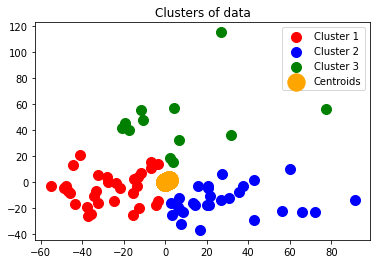

In [321]:
#visualizing the clusters
plt.scatter(x_pca[kmean_label == 0, 0], x_pca[kmean_label == 0, 1], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(x_pca[kmean_label == 1, 0], x_pca[kmean_label == 1, 1], s = 100, c = 'blue', label = 'Cluster 2')
plt.scatter(x_pca[kmean_label == 2, 0], x_pca[kmean_label == 2, 1], s = 100, c = 'green', label = 'Cluster 3')
plt.scatter(kmean_label, kmean_label, s = 300, c = 'orange', label = 'Centroids')
plt.title('Clusters of data')
plt.legend()
plt.show()

In [322]:
# metrics for clustering 
adjusted=metrics.adjusted_rand_score(labels,kmean_label )
print('adjusted_rand_score:\t',adjusted)
mutual_info=metrics.adjusted_mutual_info_score(labels,kmean_label,average_method='arithmetic')
print('adjusted_mutual_info:',mutual_info)
homo=metrics.homogeneity_score(labels,kmean_label)
print('homogeneity_score:',homo)
complete=metrics.completeness_score(labels,kmean_label)
print('complete_score:',complete)
vmeasure=metrics.v_measure_score(labels,kmean_label)
print('v_measure_score:',vmeasure)


adjusted_rand_score:	 0.11817051516157924
adjusted_mutual_info: 0.1756071809492235
homogeneity_score: 0.24588910408038955
complete_score: 0.15469973752038732
v_measure_score: 0.18991532419302262


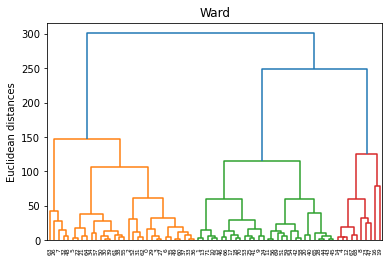

In [323]:
#heirarchial clustering
import scipy.cluster.hierarchy as hier
dendrogram_ward = hier.dendrogram(hier.linkage(x_pca, method = 'ward'))
plt.title('Ward')
plt.ylabel('Euclidean distances')
plt.show()

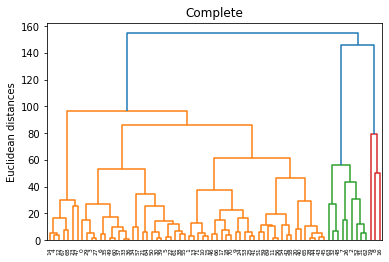

In [324]:
#complete method
dendrogram_Complete = hier.dendrogram(hier.linkage(x_pca, method = 'complete'))
plt.title('Complete')
plt.ylabel('Euclidean distances')
plt.show()

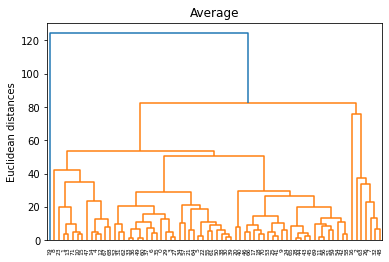

In [325]:
#average_method
dendrogram_Average = hier.dendrogram(hier.linkage(x_pca, method = 'average'))
plt.title('Average')
plt.ylabel('Euclidean distances')
plt.show()

Text(0, 0.5, 'Euclidean distances')

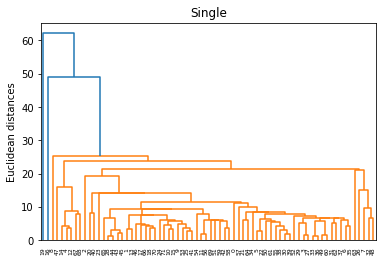

In [326]:
#single_method
dendrogram_Single = hier.dendrogram(hier.linkage(x_pca, method = 'single'))
plt.title('Single')
plt.ylabel('Euclidean distances')

In [327]:
#Agglomerative approach
from sklearn.cluster import AgglomerativeClustering
sil_score_hier = []

In [328]:
for n in range(2, 11):
    print(n)
    hc = AgglomerativeClustering(n_clusters = n, affinity = 'euclidean', linkage = 'ward')
    hcs = hc.fit_predict(x_pca)
    hc_score = silhouette_score(x_pca, hcs)
    print(hc_score)
    sil_score_hier.append(hc_score)

2
0.37965185478873253
3
0.43368718355509955
4
0.41243277468818396
5
0.4231399571218465
6
0.3799851992880453
7
0.38891416641320586
8
0.38822772725739285
9
0.37532113676113715
10
0.3686414140748512


In [329]:
hc = AgglomerativeClustering(n_clusters = 3, affinity = 'euclidean', linkage = 'ward')
hcs= hc.fit_predict(x_pca)

In [330]:
adjusted=metrics.adjusted_rand_score(labels,hcs)
print('adjusted_rand_score:\t',adjusted)
mutual_info=metrics.adjusted_mutual_info_score(labels,hcs,average_method='arithmetic')
print('adjusted_mutual_info:',mutual_info)
homo=metrics.homogeneity_score(labels,hcs)
print('homogeneity_score:',homo)
complete=metrics.completeness_score(labels,hcs)
print('complete_score:',complete)
vmeasure=metrics.v_measure_score(labels,hcs)
print('v_measure_score:',vmeasure)


adjusted_rand_score:	 0.08856337757376577
adjusted_mutual_info: 0.15148374923216656
homogeneity_score: 0.21217356552718752
complete_score: 0.1370889829828751
v_measure_score: 0.1665604195929672


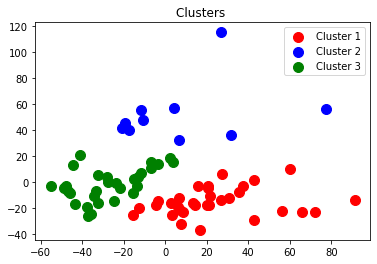

In [331]:
plt.scatter(x_pca[hcs == 0, 0], x_pca[hcs == 0, 1], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(x_pca[hcs == 1, 0], x_pca[hcs == 1, 1], s = 100, c = 'blue', label = 'Cluster 2')
plt.scatter(x_pca[hcs == 2, 0], x_pca[hcs == 2, 1], s = 100, c = 'green', label = 'Cluster 3')

plt.title('Clusters ')
plt.legend()
plt.show()

# SUMMARY
Both Kmeans and hierarchical clustering methods adds successively nearby points to form the nearest group. Here we can see the adjusted_rand_score of kmeans is 0.118 ,adjusted mutual info is 0.175,homogeneity score is 0.245,completeness score is 0.137 and v-measure is 0.166. All these values gives idea about how k means clustering performed and values shows they fall well in the range. hierarchical method provides around 0.088 as adjusted_rand_score,adjusted mutual info is 0.155,homogeneity score is 0.212,completeness score is 0.154 and v-measure is 0.18. the values of hierarchial clustering also falls within the range  and their individual outliners are highly visible from the plotting. The cluster group are formed around 3 clusters in kmeans and 3 clusters in Hierarchical technique. As we know that hierarchical cluster doesn't require any predefined number of clusters, we can build the hierarchical level of cluster analysis whereas for k-means, we got to know the predefined cluster numbers.
